In [8]:
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

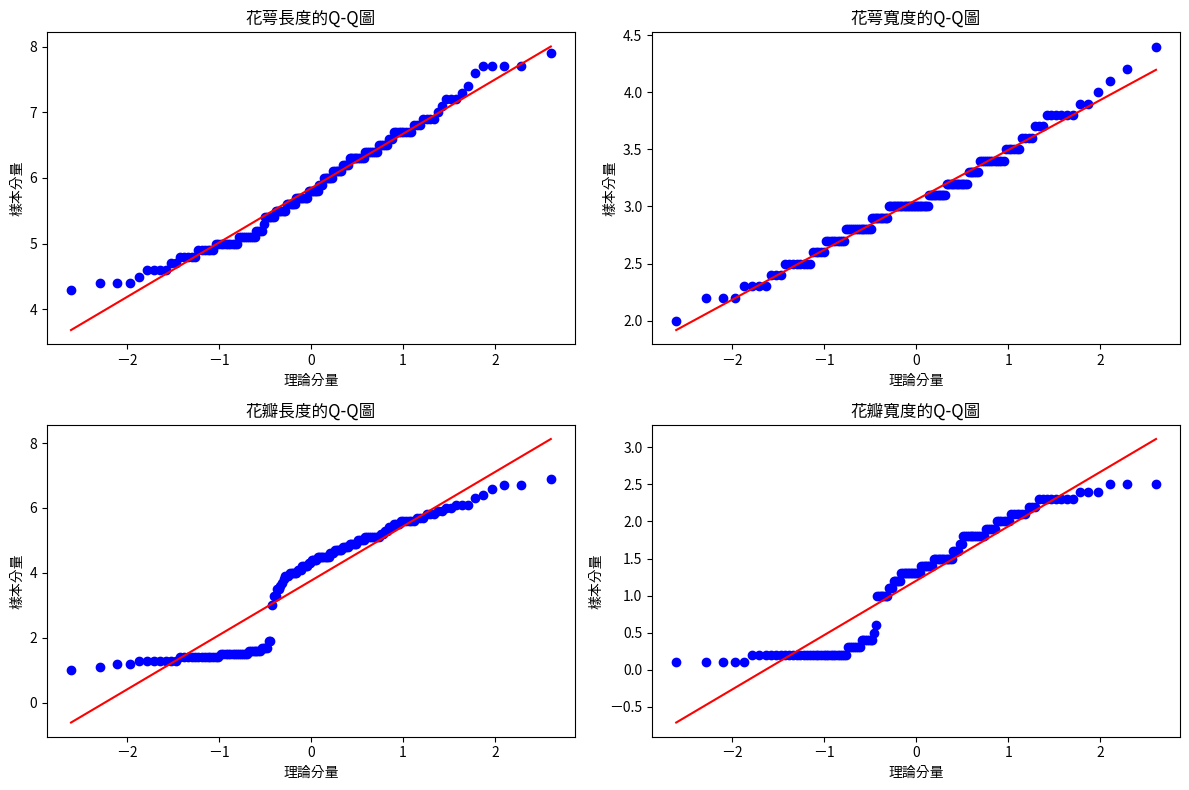

模型準確率:1.00


In [ ]:
from sklearn.datasets import load_iris
from sklearn.utils._bunch import Bunch
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
iris:Bunch = load_iris()
X = iris.data
y = iris.target
feature_names = ['花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度']
class_names = ['山鳶尾', '變色鳶尾', '維吉尼亞鳶尾']

# 2.檢查特徵是否符合高斯分佈,使用Q-Q圖
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    stats.probplot(X[:, i],dist='norm',plot=plt)
    plt.title(f'{feature_names[i]}的Q-Q圖')
    plt.xlabel('理論分量')
    plt.ylabel('樣本分量')
plt.tight_layout()
plt.show()

#3.將數據分為訓練集和測試集(80%,訓練, 20%測試)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. 訓練GaussianNB模型
model = GaussianNB() 
model = model.fit(X_train, y_train)

#5. 預測測試集
y_pred = model.predict(X_test)

#6. 評估模型
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"模型準確率:{accuracy:.2f}")

#繪製混淆矩陣